## STAT TEST 1

    1.
        A.Using simulation method, calculate the power of the t-test for the two random samples presented below with K=10 if the p-value cutoff is set to 0.05. What about the mann-whitney u test?  
        B. Suppose you had chosen a significance level (p-value cutoff) of 0.1. What would the power of the t-test be then? What is the downside of increasing the p-value cutoff, what are the consequences for your statistical testing?
        C. Consider sample size K=40 and significance level 0.05 for the same example. What will be the probability of getting a significant result when performing the t-test and mann-whitney u test? Provide an estimate using simulation method.
        D. Suppose you have two samples generated by a normal distribution with the same mean and variance. What is the probability of obtaining a significant p-value for the t-test at the 0.1 significance level? 




    2. 
        A. Consider two samples generated by one of the same distributions presented below (mixture of normal distributions,  normal distributions with 0s, normal distribution with outliers). If you perform a t-test for these samples, are you getting a higher number or smaller number of significant (<0.05) p-values than expected in the case of normal distribution assumption? Use simluation method.
        B. If you would have performed a mann-whitney u test, what would have been the shape of the p-value distribution in each of these cases?
        C. Consider two samples generated by two different distributions, as presented bellow (mixture of normal distributions, normal distributions with 0s, normal distribution with outliers). Compare the probability of obtaining a p-value <0.05 for the t-test and the mann-whintey u test. Use simulation method.
        D. Suppose you collected data from one of the distributions presented in 2C. You performed a t-test and the test result was significant (p-value<0.05). The reviewer argues that your result is invalid, because the normality assumption does not hold. You redo the analysis with a mann-whitney u test. What is the likely result in this case?
        
        

    3. 
    
        A. Consider the two samples presented below. Using simulation method, assess the power of the pearson correlation test depending on  different values of sample size K = (10,20,50) (with significance level 0.05). 
        B. What are the estimated pearson correlation coefficients for the samples of these sizes? You can look at the distribution of the correlation coefficient estimates and the average values.




    4. 
        A. Consider two unrelated samples from the normal distribution of size K = 20, with one added outlier from a different distribution (presented below). Using simulation method, what proportion of such generated samples will result in a p-value <0.05 for the pearson correlation test? What about the spearman correlation test? Repeat the same analysis for sample of size K=100 with one outlier (presented below).


        B. Consider the analysis presented for two samples with uniform distribution or two samples with lognormal distribution presented during the seminar (repeated below). Together with 4A, what conclusions can you draw about the "dangers" of using pearson correlation on data with non-normal distributions?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns



from numpy.random import uniform
from numpy.random import normal
from numpy.random import exponential
from numpy.random import lognormal

from numpy.random import choice
from numpy.random import permutation
from scipy.stats import shapiro
from scipy.stats import kstest

from scipy.stats import pearsonr
from scipy.stats import spearmanr

%matplotlib inline




In [2]:
def makeTWOscatters(rand_sample1, rand_sample2):
    fig, (ax1,ax2)=plt.subplots(2,1,figsize=(4,4),sharex=True)
    #random scatter for y axis
    norm=normal(0,0.1,len(rand_sample1))
    ax1.scatter(rand_sample1,norm,s=15)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_ylim([-1,1])
    
    ax1.plot([np.mean(rand_sample1),np.mean(rand_sample1)],[-0.35,0.35],color='black',linestyle='--')
    ax1.plot([np.mean(rand_sample1)-np.std(rand_sample1), np.mean(rand_sample1)+np.std(rand_sample1)],
             [-0.75,-0.75],
            color='hotpink',linewidth=2,linestyle='--')      
    ax1.set_yticks([])
    
    
    norm=normal(0,0.1,len(rand_sample2))
    ax2.scatter(rand_sample2,norm,s=15,color='teal')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_ylim([-1,1])
    
    ax2.plot([np.mean(rand_sample2),np.mean(rand_sample2)],[-0.35,0.35],color='black',linestyle='--')
    ax2.plot([np.mean(rand_sample2)-np.std(rand_sample2), np.mean(rand_sample2)+np.std(rand_sample2)],
             [-0.75,-0.75],
            color='hotpink',linewidth=2,linestyle='--')      
    ax2.set_yticks([])

In [3]:
def makeHIST(p):
    fig=plt.figure(figsize=(3,2))
    plt.hist(p,bins=20)

    ax=plt.gca()
    ax.spines['top'].set_visible(False) 
    ax.spines['left'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    plt.yticks([])
    plt.xlim(-0.02,1.02)
    plt.xlabel('pv')
    plt.show()


## question 1

In [4]:
K=10
#K=40
rand_sample1=normal(10,1,K)
rand_sample2=normal(11,1,K)

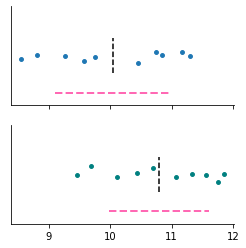

In [5]:
makeTWOscatters(rand_sample1, rand_sample2)

## question 2 A

In [6]:
# mixture of two normal
K=20

tmpa=normal(10,1,K)
tmpb=normal(13,1,K)
rand_sample1=list(tmpa)+list(tmpb)


tmpc=normal(10,1,K)
tmpd=normal(13,1,K)
    
rand_sample2=list(tmpc)+list(tmpd)

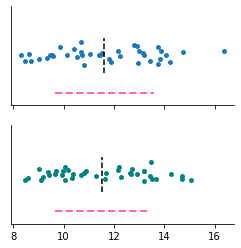

In [7]:
makeTWOscatters(rand_sample1, rand_sample2)

In [8]:
# normal distribution with 10% random 0s
K=20

rand_sample1=normal(10,2,K)
i1=choice(np.arange(0,K),int(np.round(K*0.1)),replace=False)
rand_sample1[i1]=0    

    
rand_sample2=normal(10,2,K)
i2=choice(np.arange(0,K),int(np.round(K*0.1)),replace=False)
rand_sample2[i2]=0   

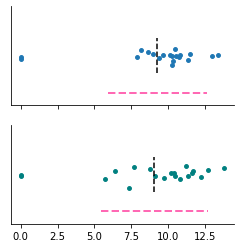

In [9]:
makeTWOscatters(rand_sample1, rand_sample2)

In [10]:
#normal distribution with 5% outliers
K=100
    
tmp1=normal(10,2,K)  
outliers1=normal(20,2,int(np.round(K*0.05)))
rand_sample1=list(tmp1)+list(outliers1)
    
tmp2=normal(10,2,K)  
outliers2=normal(20,2,int(np.round(K*0.05)))
rand_sample2=list(tmp2)+list(outliers2)

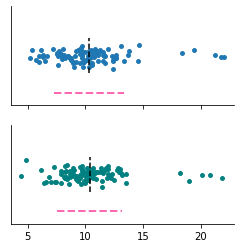

In [11]:
makeTWOscatters(rand_sample1, rand_sample2)

## question 2 C

In [12]:
# mixture of two normal
tmpa=normal(10,1,K)
tmpb=normal(13,1,K)
rand_sample1=list(tmpa)+list(tmpb)

tmpc=normal(10+1,1,K)
tmpd=normal(13+1,1,K)
    
rand_sample2=list(tmpc)+list(tmpd)

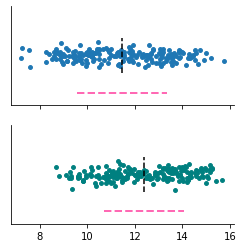

In [13]:
makeTWOscatters(rand_sample1, rand_sample2)

In [14]:
# normal distribution with 10% random 0s
K=20

rand_sample1=normal(10,2,K)
i1=choice(np.arange(0,K),int(np.round(K*0.1)),replace=False)
rand_sample1[i1]=0    

    
rand_sample2=normal(11,2,K)
i2=choice(np.arange(0,K),int(np.round(K*0.1)),replace=False)
rand_sample2[i2]=0   

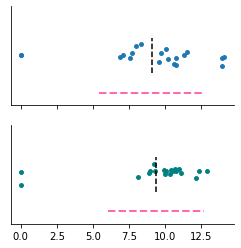

In [15]:
makeTWOscatters(rand_sample1, rand_sample2)

In [16]:
#normal distribution with 5% outliers
K=100
    
tmp1=normal(10,2,K)  
outliers1=normal(20,2,int(np.round(K*0.05)))
rand_sample1=list(tmp1)+list(outliers1)
    
tmp2=normal(11,2,K)  
outliers2=normal(20,2,int(np.round(K*0.05)))
rand_sample2=list(tmp2)+list(outliers2)

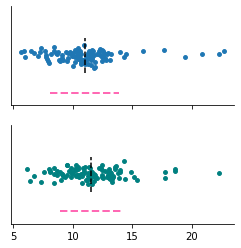

In [17]:
makeTWOscatters(rand_sample1, rand_sample2)

## question 3 A B

In [18]:
#K=10
#K=20
K=50


x=normal(10,1,K)
y=2*x

noise1=normal(0,1,K)
noise2=normal(0,1,K)

rand_sample1=x+noise1
rand_sample2=y+noise2

Text(0, 0.5, 'feature 2')

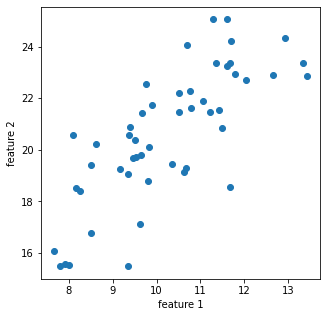

In [19]:
fig=plt.figure(figsize=(5,5))
plt.scatter(rand_sample1,rand_sample2)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

## question 4 A

 two unrelated uniform distributions with one outlier, K=20

In [37]:
K=20

x=normal(20,3,K)   
outliers1=exponential(30,1)
rand_sample1=list(x)+list(outliers1)

y=normal(20,3,K) 
outliers2=exponential(30,1)
rand_sample2=list(y)+list(outliers2)


Text(0, 0.5, 'feature 2')

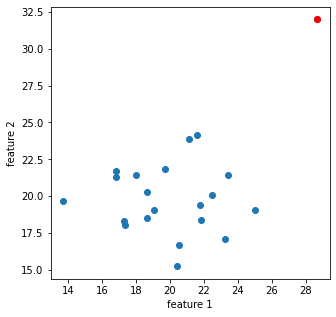

In [38]:
fig=plt.figure(figsize=(5,5))
plt.scatter(rand_sample1,rand_sample2)
plt.scatter(outliers1,outliers2,color='red')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

 two unrelated uniform distributions with one outlier, K=100

In [39]:
K=100

x=normal(20,3,K)   
outliers1=exponential(30,1)
rand_sample1=list(x)+list(outliers1)

y=normal(20,3,K) 
outliers2=exponential(30,1)
rand_sample2=list(y)+list(outliers2)


Text(0, 0.5, 'feature 2')

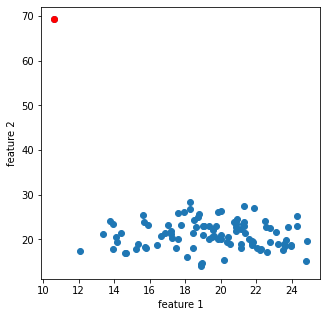

In [40]:
fig=plt.figure(figsize=(5,5))
plt.scatter(rand_sample1,rand_sample2)
plt.scatter(outliers1,outliers2,color='red')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

## question 4 B

 two uniform distributions, unrelated

In [24]:
K=10

N=1000

pv_pears=pd.Series(index=np.arange(0,N),dtype=float)
pv_spearm=pd.Series(index=np.arange(0,N),dtype=float)
for i in np.arange(0,N):
    
    x=uniform(10,20,K)
    y=uniform(10,20,K)

    noise1=normal(0,2,K)
    noise2=normal(0,2,K)

    rand_sample1=x+noise1
    rand_sample2=y+noise2
    
    pv_pears[i]=pearsonr(rand_sample1,rand_sample2)[1]
    pv_spearm[i]=spearmanr(rand_sample1,rand_sample2)[1]

Text(0, 0.5, 'feature 2')

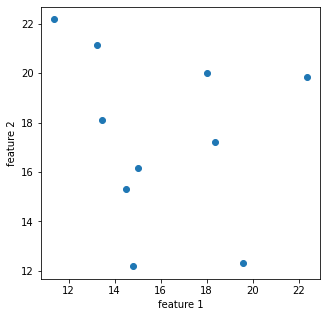

In [25]:
fig=plt.figure(figsize=(5,5))
plt.scatter(rand_sample1,rand_sample2)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

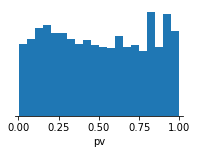

In [26]:
makeHIST(pv_pears)

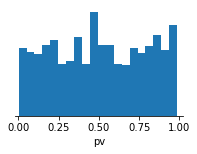

In [27]:
makeHIST(pv_spearm)

 two lognormal distributions,  unrelated

In [51]:
K=10

N=1000



pv_pears=pd.Series(index=np.arange(0,N),dtype=float)
pv_spearm=pd.Series(index=np.arange(0,N),dtype=float)
for i in np.arange(0,N):
    
    x=normal(10,4,K)
    y=normal(10,4,K)

    noise1=normal(0,1,K)
    noise2=normal(0,1,K)

    rand_sample1=2**x+noise1
    rand_sample2=2**y+noise2

    pv_pears[i]=pearsonr(rand_sample1,rand_sample2)[1]
    pv_spearm[i]=spearmanr(rand_sample1,rand_sample2)[1]

Text(0, 0.5, 'feature 2')

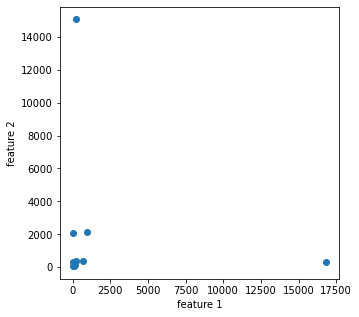

In [52]:
fig=plt.figure(figsize=(5,5))
plt.scatter(rand_sample1,rand_sample2)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

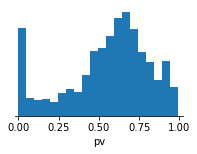

In [53]:
makeHIST(pv_pears)

In [54]:
np.sum(pv_pears<0.05)

87

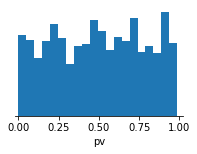

In [50]:
makeHIST(pv_spearm)